# AAPL Time Series Analysis and Forecasting

In this project, I conducted a time series analysis of **Apple's (AAPL) daily closing prices** and applied forecasting techniques to predict future trends.  
Each task includes clear instructions and a code snippet, which allowed me to implement the steps myself and gain hands-on experience in time series analysis and forecasting.  

---

## Project Goals
- Understand the daily stock price behavior of Apple.
- Identify patterns in the time series data and apply forecasting methods.
- Enhance practical skills in **Python** and key data analysis libraries such as **pandas**, **matplotlib**, and **statsmodels**.

---

## Approach
- Load and explore the dataset.
- Clean and preprocess the data for analysis.
- Analyze the time series to detect trends and seasonal patterns.
- Build and evaluate forecasting models to predict future prices.


#Initial Setup: Load Data
In this first step, we load historical stock price data for Apple (AAPL) from Yahoo Finance using the yfinance library. We only keep the 'Close' price (daily closing price), which is typically used for time series forecasting. The column is renamed to y to simplify model compatibility in later steps. This setup is essential before proceeding with any data analysis or modeling.

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf

df = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
df = df[['Close']]
df.columns = ['y']
df.head()

df = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
df = df[['Close']]
df.columns = ['y']
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,y
Date,
2020-01-02,72.716072
2020-01-03,72.009132
2020-01-06,72.582901
2020-01-07,72.241547
2020-01-08,73.403648



## Inspect the DataFrame

I wanted to start by really understanding the dataset so I could apply **Time Series** techniques correctly.  
Here's what I did to get a good feel of the data:

- Checked the **DataFrame info** to see the column types and number of observations.
- Looked at the shape of the data to know how many rows and columns there are.
- Counted missing values to make sure the data quality is good.
- Examined the **index** to see the date range covered by the dataset.

Doing this helped me explore the data and get it ready for analysis and forecasting.

In [ ]:
print(df.info())

print("Shape of DataFrame:", df.shape)

print("Missing values:", df.isna().sum())

print("Date range:", df.index.min(), "to", df.index.max())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1006 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB
None
Shape of DataFrame: (1006, 1)
Missing values: y    0
dtype: int64
Date range: 2020-01-02 00:00:00 to 2023-12-29 00:00:00


## Preprocess Date Index and Missing Values

As I continued exploring the dataset, I wanted to make sure it was ready for **Time Series analysis**.  
I focused on the dates and any missing values to have clean, continuous data:

- Set the DataFrame index to **business-day frequency ('B')** so the dates align properly.
- Checked for missing values again to see if any gaps remained.
- Filled missing values forward using `fillna(method='ffill')` to maintain continuity.
- Verified that there were no more missing values and checked the new shape of the data.

This step helped me ensure the dataset is clean and ready for accurate analysis and forecasting.

In [ ]:
df = df.asfreq('B')

print("Missing values after setting business-day frequency:", df.isna().sum())


df.fillna(method='ffill', inplace=True)

print("Missing values after forward fill:", df.isna().sum())
print("New shape after filling missing values:", df.shape)

Missing values after setting business-day frequency: y    36
dtype: int64
Missing values after forward fill: y    0
dtype: int64
New shape after filling missing values: (1042, 1)


## Exploratory Data Analysis (EDA)

I wanted to dive deeper into the data and **visually understand the patterns** in Apple's stock prices.  
This helped me see trends and seasonal behaviors before building any models:

- Plotted the **daily closing prices** to get a clear view of overall trends.
- Checked **monthly seasonality** using `month_plot` to see how prices vary across months.
- Explored **quarterly seasonality** with `quarter_plot` to identify patterns throughout the year.

Visualizing the data like this gave me valuable insights into trends and recurring patterns, which is key for accurate forecasting.

In [ ]:
!pip install seaborn statsmodels matplotlib


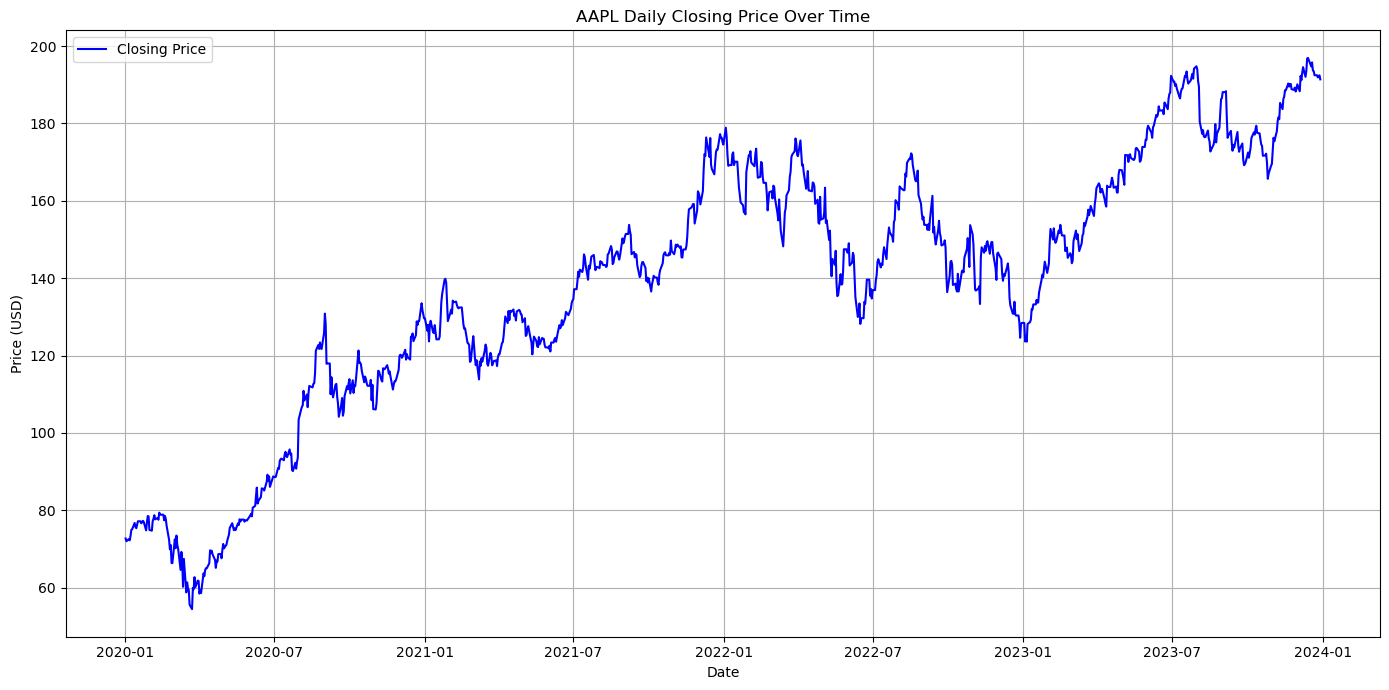

<Figure size 800x500 with 0 Axes>

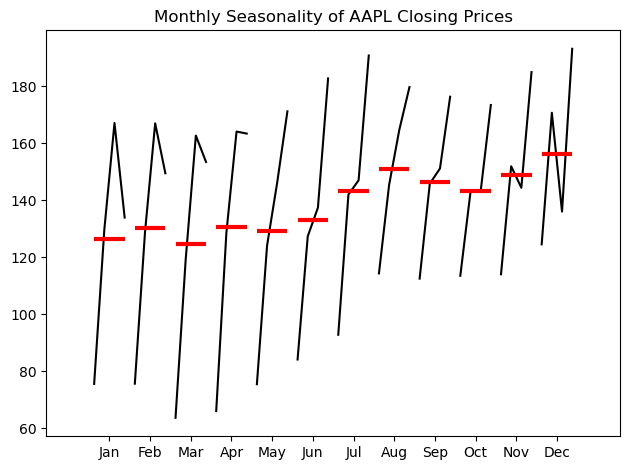

<Figure size 800x500 with 0 Axes>

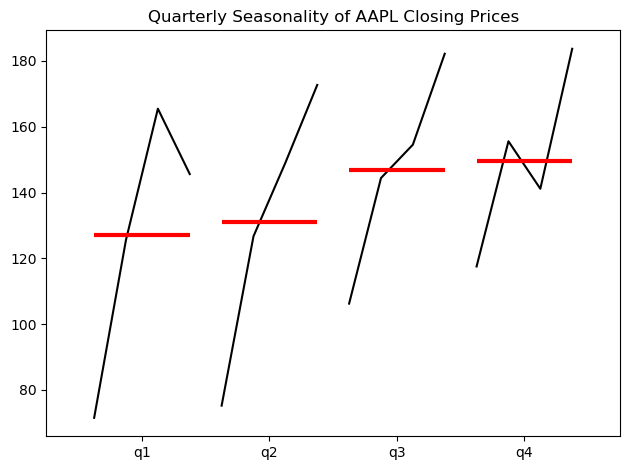

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot



# 1) Daily plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='y', label='Closing Price', color='blue')
plt.title('AAPL Daily Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2) Monthly seasonality
df_monthly = df.resample('M').mean()
plt.figure(figsize=(8, 5))
month_plot(df_monthly['y'])
plt.title('Monthly Seasonality of AAPL Closing Prices')
plt.tight_layout()
plt.show()

# 3) Quarterly seasonality
df_quarterly = df.resample('Q').mean()
plt.figure(figsize=(8, 5))
quarter_plot(df_quarterly['y'])
plt.title('Quarterly Seasonality of AAPL Closing Prices')
plt.tight_layout()
plt.show()

## Understanding the Components of the Time Series

I wanted to get a better feel for **what’s really happening** with Apple’s stock prices over time.  
To do this, I broke the data into its main components:

- Imported `seasonal_decompose` from **statsmodels**.
- Applied the decomposition on `df['y']` using an **additive model** with a period of 252 (roughly one trading year).
- Plotted the results to see the **trend**, **seasonal patterns**, and **residuals** separately.

Seeing these components helped me understand which parts of the data are consistent patterns and which are just random fluctuations, which makes forecasting more intuitive.


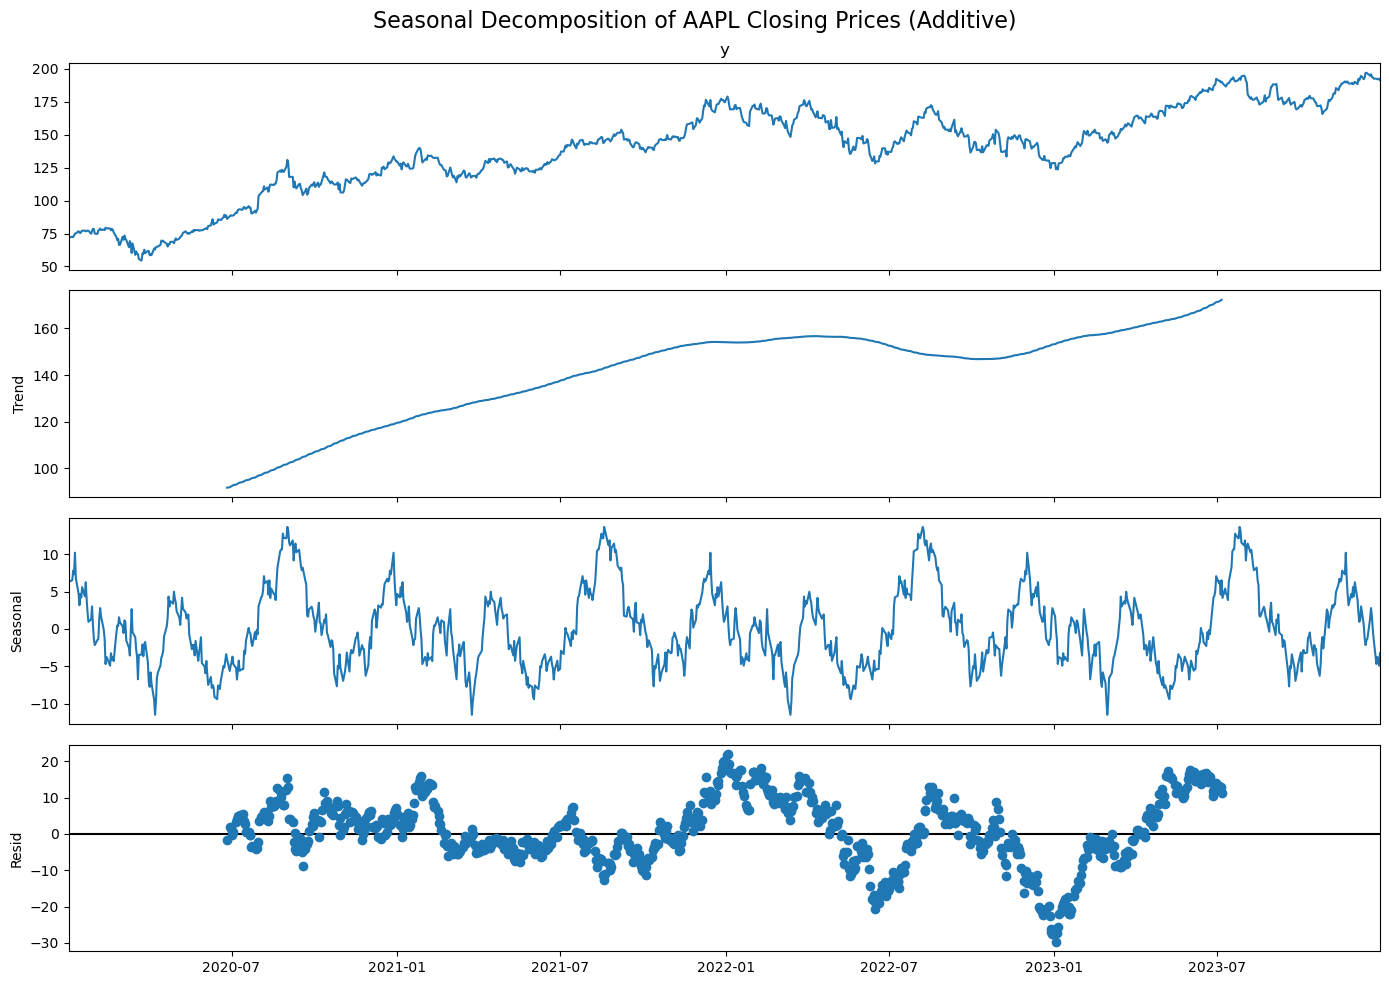

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['y'], model='additive', period=252)

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Seasonal Decomposition of AAPL Closing Prices (Additive)", fontsize=16)
plt.tight_layout()
plt.show()

## Exploring Relationships in the Data

At this stage, I wanted to understand **how past values influence future prices** in Apple’s stock data.  
To do this, I looked at the autocorrelations:

- Imported `plot_acf` and `plot_pacf` from **statsmodels**.
- Plotted the **ACF** (Autocorrelation Function) for 100 lags to see how the series correlates with its past values.
- Plotted the **PACF** (Partial Autocorrelation Function) for 100 lags to identify the direct influence of previous points.

This step helped me get a sense of the memory in the time series and guided me in selecting the right parameters for forecasting models.

<Figure size 1200x600 with 0 Axes>

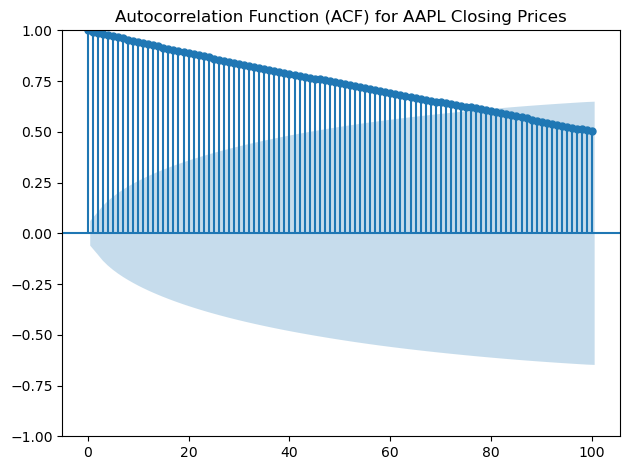

<Figure size 1200x600 with 0 Axes>

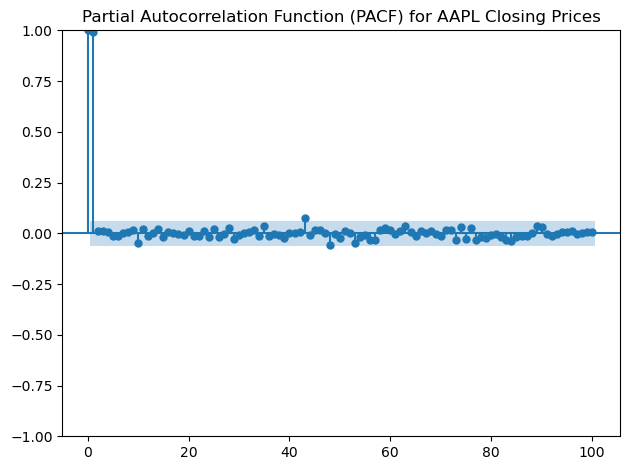

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(df['y'], lags=100)
plt.title('Autocorrelation Function (ACF) for AAPL Closing Prices')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['y'], lags=100, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) for AAPL Closing Prices')
plt.tight_layout()
plt.show()


## Forecasting with Prophet

I wanted to try **Prophet** to see how well I could predict Apple’s stock prices for the next month.  
Since Prophet expects the data to have specific column names (`ds` for dates and `y` for values), I needed to make a few adjustments first:

- Created a new DataFrame `df_prophet` by **resetting the index** so the dates became a regular column.
- Renamed the columns to `ds` and `y` to match Prophet’s requirements.
- Imported and initialized **Prophet()**, then fit the model on `df_prophet`.
- Created a future DataFrame for **30 business days** ahead.
- Generated the forecast and looked at the **last few predictions** to see how it behaved.
- Plotted the forecast along with its **components** to understand trend and seasonality.

Working with Prophet helped me see how time series models can capture trends and seasonal effects, making forecasting more intuitive and visual.


In [ ]:
!pip install prophet


C:\Users\Asaye\AppData\Local\Programs\Orange\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
15:09:54 - cmdstanpy - INFO - Chain [1] start processing
15:09:55 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
1067 2024-02-05  201.647170  192.360945  210.725703
1068 2024-02-06  202.058781  193.327109  210.980861
1069 2024-02-07  202.298001  193.892879  211.161931
1070 2024-02-08  202.289204  193.444744  211.622507
1071 2024-02-09  202.379735  193.889298  210.731861


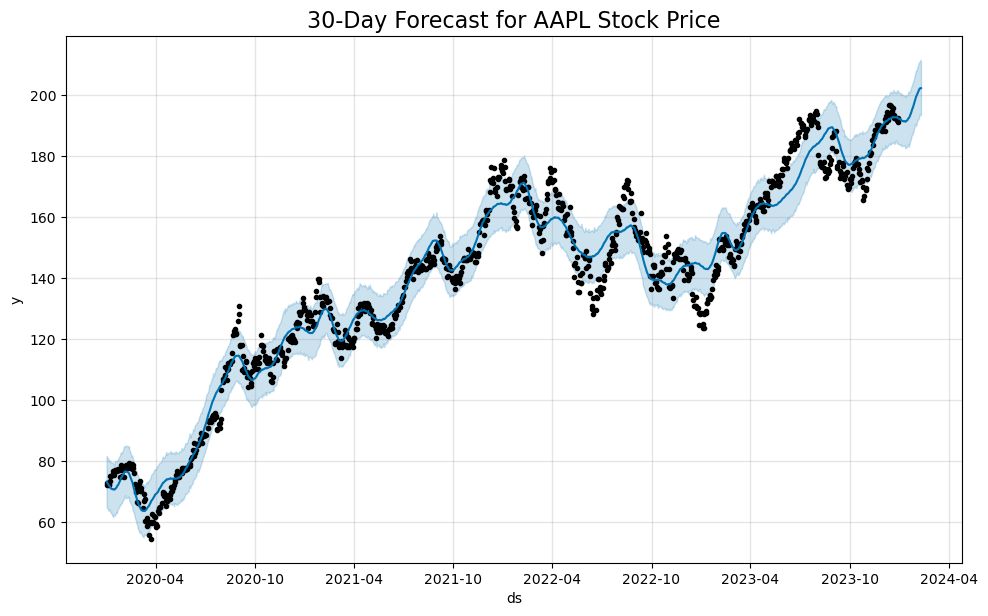

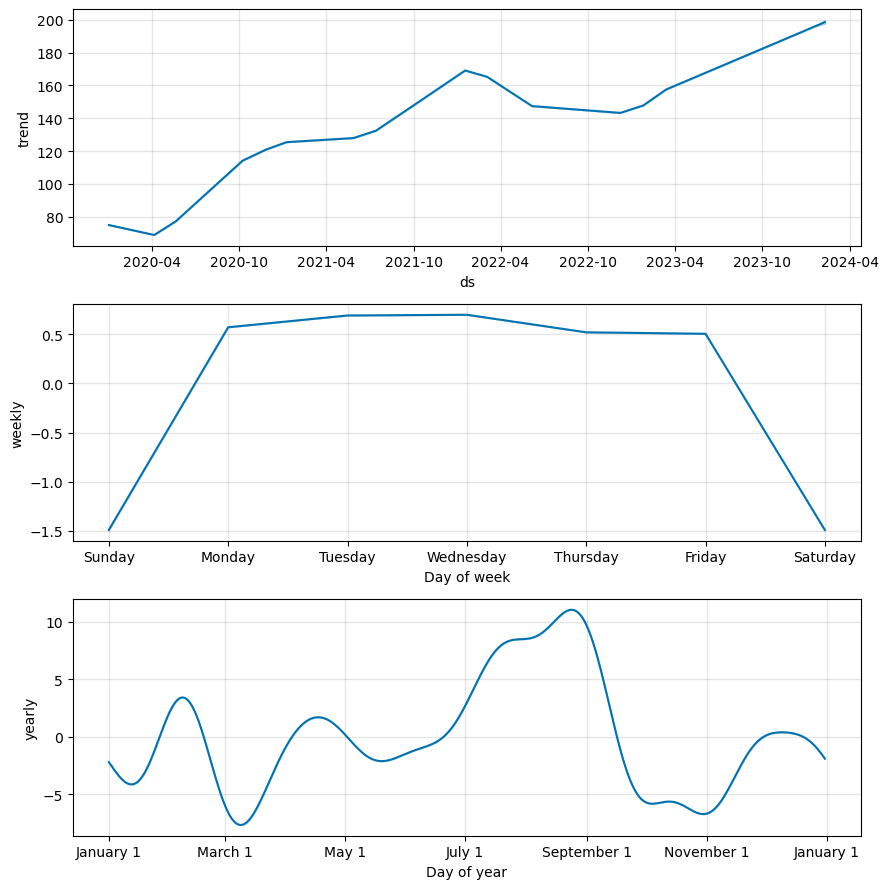

In [ ]:
from prophet import Prophet
df_prophet = df.reset_index()

df_prophet = df_prophet.rename(columns={'Date':'ds', 'y': 'y'})

model = Prophet()

model.fit(df_prophet)

future = model.make_future_dataframe(periods=30, freq='B')

forecast = model.predict(future)

print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

model.plot(forecast)
plt.title('30-Day Forecast for AAPL Stock Price', fontsize=16)
plt.show()

model.plot_components(forecast)
plt.show()